# kNN - Animal Classification

### Adam Little
### Final Project - CS 627


#### This was the first part of my project. I thought it would be good to get comfortable with Machine Learning with an easy data set before jumping straight into image classification. 

#### Metric for success: Accuracy > 1/7


### Zoo Animal Classification Data Set

https://www.kaggle.com/uciml/zoo-animal-classification

#### Using K Nearest Neighbors to predict Zoo Animal Class

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Anatomical and Physiological Characteristics

In [2]:
zoo_df2 = pd.read_csv('zoo-animal-classification/zoo.csv')
zoo_df2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# What class does each animal belong to?

In [3]:
#Information on Animal Classes
class_df = pd.read_csv('zoo-animal-classification/class.csv', header=1)
class_df.head()


,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf"
0,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
1,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
2,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,5,4,Amphibian,"frog, frog, newt, toad"
4,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."


In [4]:
# How Many of Each Class?

class_count = zoo_df2["class_type"].value_counts()

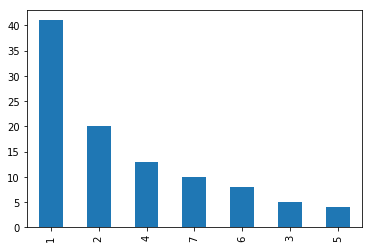

In [5]:
class_count.plot(kind='bar')

In [6]:
# Making the Data Set Usable for k-NN

# Import Dataset
zoo_df = pd.read_csv('zoo-animal-classification/zoo.csv')

# Class Type Will be our outcome variable
class_type = zoo_df["class_type"]
class_val = class_type.values

# Need to drop non-numerical columns
zoo_df = zoo_df.drop(columns="class_type")
zoo_df = zoo_df.drop(columns="animal_name")
zoo = zoo_df.values

# Data with Information on Animal Classes
zoo.shape, class_type.shape, zoo.size, class_type.size

((101, 16), (101,), 1616, 101)

## Test Train Split

In [7]:
X = zoo 
y = class_val

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=.3,
                                                 stratify=y)

## Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameter = {"n_neighbors": np.arange(1,20,1)}

search = RandomizedSearchCV(knn, parameter)
search.fit(X_train, y_train)        
accuracy= search.score(X_test, y_test)
                           
print("Accuracy:", accuracy)       
print("Neighbors:", search.best_params_) 

## kNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
knn.score(X_test, y_test)

0.967741935483871

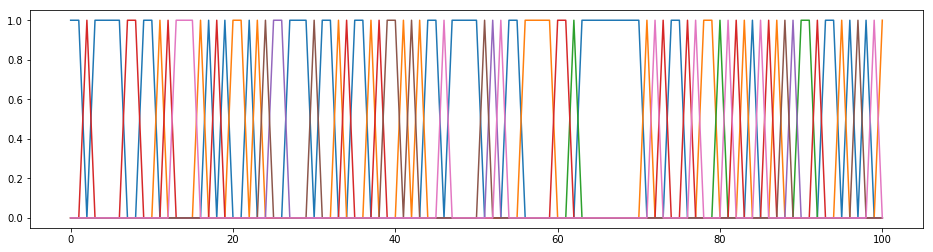

In [22]:
fig = plt.figure(figsize=(16,4))
prob_plot = knn.predict_proba(X)
plt.plot(prob_plot);

In [23]:
y_test_hat = knn.predict(X_test)
y_test_hat, y_test

(array([4, 2, 4, 1, 1, 4, 1, 1, 7, 7, 1, 1, 1, 1, 2, 5, 2, 4, 1, 2, 1, 1,
        2, 6, 6, 2, 3, 1, 4, 7, 1]),
 array([4, 2, 4, 1, 1, 4, 1, 1, 7, 7, 1, 1, 1, 1, 2, 5, 2, 3, 1, 2, 1, 1,
        2, 6, 6, 2, 3, 1, 4, 7, 1]))

## Model Complexity Curve: Visually Understanding Overfitting and Underfitting

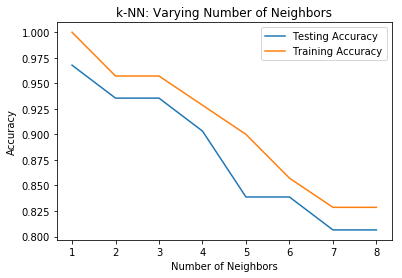

In [24]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()